In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [56]:
# Load data
df_depression = pd.read_csv("curves/plots_depression.csv")
df_potentiation = pd.read_csv("curves/plots_potentiation.csv")
df_simul = pd.read_csv("curves/plots_simul.csv")

In [74]:
# Data structure for simul
dict_simul = {}
vg_simul_list = [1, 1.5, 2, 2.5, 3]
for n in range(1,5):
    dict_simul[f"Config {n}"] = {}
    for k, vg in enumerate(vg_simul_list):
        i = (n-1)*5 + k
        dict_simul[f"Config {n}"][f"Vg = {vg}V"] = {}
        dict_simul[f"Config {n}"][f"Vg = {vg}V"]["X"] = dict_simul[f"Config {n}"][f"Vg = {vg}V"]["X"] = df_simul.iloc[:,2*i].tolist()
        dict_simul[f"Config {n}"][f"Vg = {vg}V"]["Y"] = dict_simul[f"Config {n}"][f"Vg = {vg}V"]["Y"] = df_simul.iloc[:,2*i + 1].tolist()

config1 = [200, 5]
config2 = [200, 10]
config3 = [1000, 5]
config4 = [1000, 10]

# Data structure for potentiation and depression
vg_list = np.arange(1, 1.80, 0.05)
dict_potentiation = {}
dict_depression = {}
for i, vg in enumerate(vg_list):
    vg = round(vg, 2)
    dict_potentiation[f"ERS = {vg}V"] = {}
    dict_potentiation[f"ERS = {vg}V"]["X"] = df_potentiation.iloc[:, 2*i].tolist()
    dict_potentiation[f"ERS = {vg}V"]["Y"] = df_potentiation.iloc[:, 2*i+1].tolist()

    dict_depression[f"PRG = {vg}V"] = {}
    dict_depression[f"PRG = {vg}V"]["X"] = df_depression.iloc[:, 2*i].tolist()
    dict_depression[f"PRG = {vg}V"]["Y"] = df_depression.iloc[:, 2*i+1].tolist()

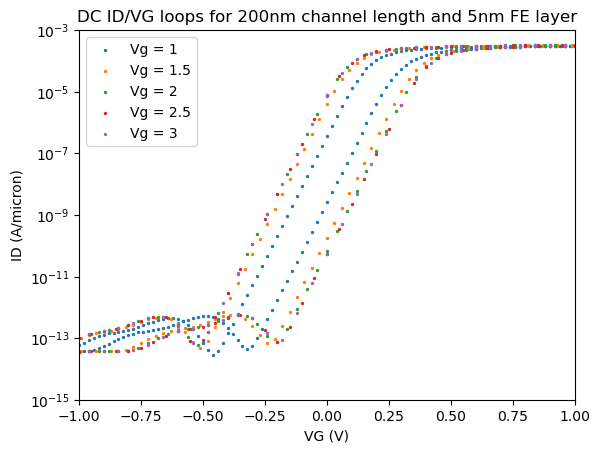

In [206]:
# Plot 5 cases config 1

for vg in vg_simul_list:
    X = dict_simul["Config 1"][f"Vg = {vg}V"]["X"]
    Y = dict_simul["Config 1"][f"Vg = {vg}V"]["Y"]
    plt.scatter(X,Y, label=f"Vg = {vg}", s=2)

plt.yscale("log")
plt.xlim([-1, 1])
plt.ylim([1e-15, 1e-3])
plt.xlabel("VG (V)")
plt.ylabel("ID (A/micron)")
plt.title(f"DC ID/VG loops for {config1[0]}nm channel length and {config1[1]}nm FE layer")
plt.legend()
plt.show()

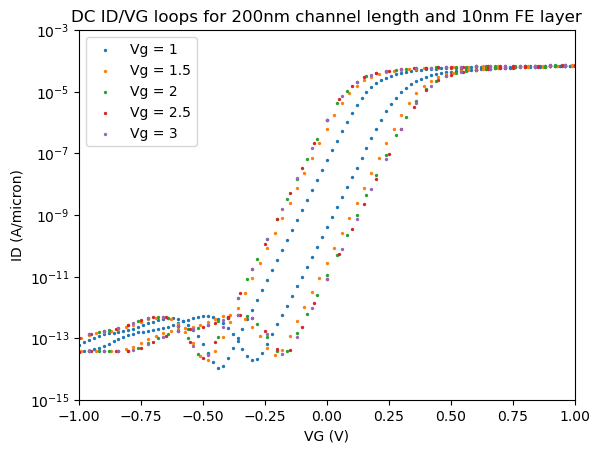

In [207]:
# Plot 5 cases config 2

for vg in vg_simul_list:
    X = dict_simul["Config 2"][f"Vg = {vg}V"]["X"]
    Y = dict_simul["Config 2"][f"Vg = {vg}V"]["Y"]
    plt.scatter(X,Y, label=f"Vg = {vg}", s=2)

plt.yscale("log")
plt.xlim([-1, 1])
plt.ylim([1e-15, 1e-3])
plt.xlabel("VG (V)")
plt.ylabel("ID (A/micron)")
plt.title(f"DC ID/VG loops for {config2[0]}nm channel length and {config2[1]}nm FE layer")
plt.legend()
plt.show()

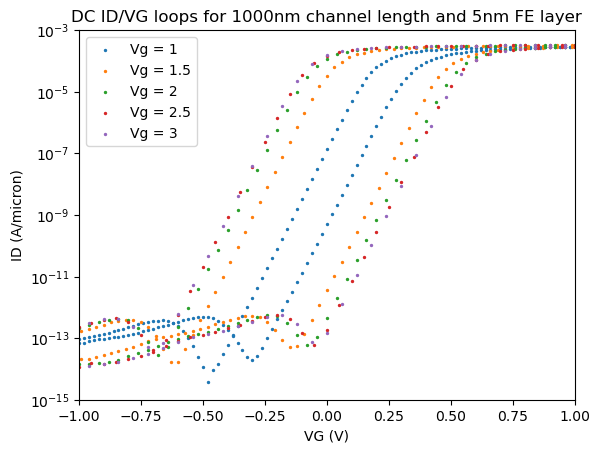

In [208]:
# Plot 5 cases config 3

for vg in vg_simul_list:
    X = dict_simul["Config 3"][f"Vg = {vg}V"]["X"]
    Y = dict_simul["Config 3"][f"Vg = {vg}V"]["Y"]
    plt.scatter(X,Y, label=f"Vg = {vg}", s=2)

plt.yscale("log")
plt.xlim([-1, 1])
plt.ylim([1e-15, 1e-3])
plt.xlabel("VG (V)")
plt.ylabel("ID (A/micron)")
plt.title(f"DC ID/VG loops for {config3[0]}nm channel length and {config3[1]}nm FE layer")
plt.legend()
plt.show()

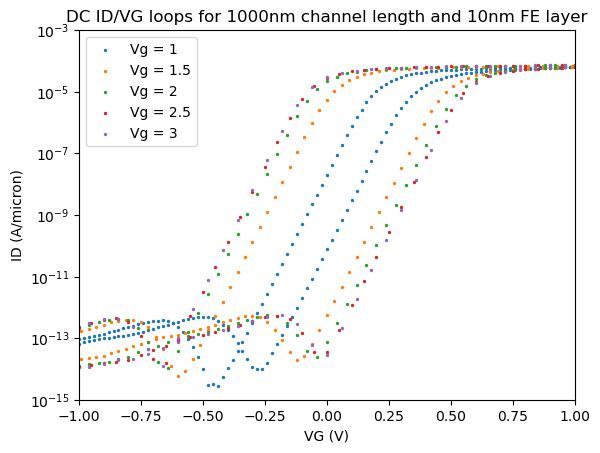

In [209]:
# Plot 5 cases config 4

for vg in vg_simul_list:
    X = dict_simul["Config 4"][f"Vg = {vg}V"]["X"]
    Y = dict_simul["Config 4"][f"Vg = {vg}V"]["Y"]
    plt.scatter(X,Y, label=f"Vg = {vg}", s=2)

    

plt.yscale("log")
plt.xlim([-1, 1])
plt.ylim([1e-15, 1e-3])
plt.xlabel("VG (V)")
plt.ylabel("ID (A/micron)")
plt.title(f"DC ID/VG loops for {config4[0]}nm channel length and {config4[1]}nm FE layer")
plt.legend()
plt.show()

In [214]:
# Memory windows

dict_mw = {}
for i in range(1,5):
    dict_mw[f"Config {i}"] = None

df_mw = pd.DataFrame(dict_mw, index=vg_simul_list)

def compute_mw(n, vg):
    y_line = 1e-7

    x_curve = np.array(dict_simul[f"Config {n}"][f"Vg = {vg}V"]["X"])
    y_curve = np.array(dict_simul[f"Config {n}"][f"Vg = {vg}V"]["Y"])
    n = len(y_curve)

    argmin1 = np.argmin(np.abs(y_line - np.array(y_curve[:n//2])))
    argmin2 = np.argmin(np.abs(y_line - np.array(y_curve[n//2:]))) + n//2

    return abs(x_curve[argmin1] - x_curve[argmin2])

for n in range(1,5):
    for vg in vg_simul_list:
        df_mw.loc[vg, f"Config {n}"] = compute_mw(n, vg)

df_mw

    

,Config 1,Config 2,Config 3,Config 4
1.0,0.14,0.12,0.16,0.16
1.5,0.27,0.27,0.45,0.45
2.0,0.32,0.32,0.56,0.56
2.5,0.35,0.35,0.65,0.65
3.0,0.3,0.3,0.66,0.66


In [213]:
# Memory windows 2

dict_mw2 = {}
for i in range(1,5):
    dict_mw2[f"Config {i}"] = None

df_mw2 = pd.DataFrame(dict_mw, index=vg_simul_list)

from scipy import optimize

def compute_mw2(n, vg):

    x_curve = np.array(dict_simul[f"Config {n}"][f"Vg = {vg}V"]["X"])
    y_curve = np.array(dict_simul[f"Config {n}"][f"Vg = {vg}V"]["Y"])
    n = len(y_curve)

    def func(x,a,b):
        return a*x+b

    mask = (y_curve>1e-11) & (y_curve<1e-7)
    fit1, covariance1 = optimize.curve_fit(func, x_curve[:n//2][mask[:n//2]], y_curve[:n//2][mask[:n//2]])
    fit2, covariance2 = optimize.curve_fit(func, x_curve[n//2:][mask[n//2:]], y_curve[n//2:][mask[n//2:]])

    # plt.scatter(x_curve, y_curve)
    # plt.plot(x_curve, fit1[0]*x_curve + fit1[1])
    # plt.plot(x_curve, fit2[0]*x_curve + fit2[1])
    # plt.yscale("log")
    # plt.xlim([-1, 1])
    # plt.ylim([1e-15, 1e-3])
    # plt.show()


    return abs(fit1[1]-fit2[1])

for n in range(1,5):
    for vg in vg_simul_list:
        df_mw2.loc[vg, f"Config {n}"] = compute_mw2(n, vg)

df_mw2


,Config 1,Config 2,Config 3,Config 4
1.0,0.0,0.0,0.0,0.0
1.5,0.0,0.0,0.0,0.0
2.0,0.0,0.0,0.0,0.0
2.5,0.0,0.0,0.0,0.0
3.0,0.0,0.0,0.0,0.0


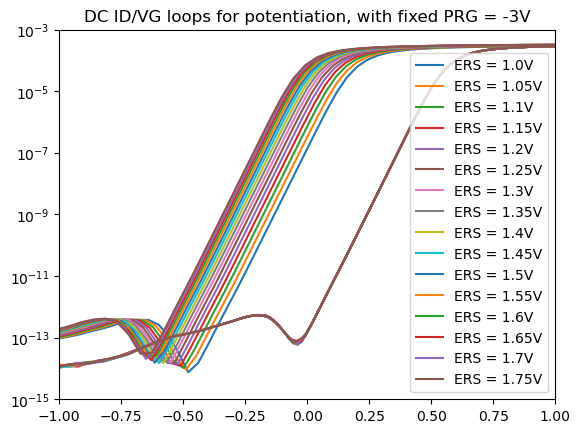

In [155]:
# Potentiation curves

for vg in vg_list:
    vg = round(vg, 2)
    X = dict_potentiation[f"ERS = {vg}V"]["X"]
    Y = dict_potentiation[f"ERS = {vg}V"]["Y"]
    plt.plot(X,Y,label=f"ERS = {vg}V")

plt.xlim([-1,1])
plt.yscale("log")
plt.ylim([1e-15,1e-3])
plt.title("DC ID/VG loops for potentiation, with fixed PRG = -3V")
plt.legend()
plt.show()

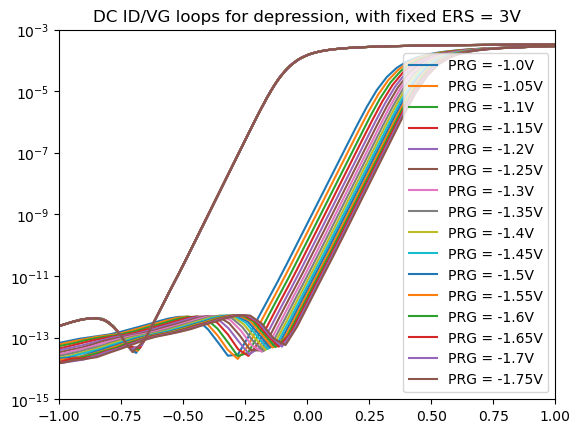

In [215]:
# Depression curves

for vg in vg_list:
    vg = round(vg, 2)
    X = dict_depression[f"PRG = {vg}V"]["X"]
    Y = dict_depression[f"PRG = {vg}V"]["Y"]
    plt.plot(X,Y,label=f"PRG = -{vg}V")

plt.xlim([-1,1])
plt.yscale("log")
plt.ylim([1e-15,1e-3])
plt.title("DC ID/VG loops for depression, with fixed ERS = 3V")
plt.legend()
plt.show()

In [ ]:
# IDS